# **Seoul Bike Sharing Demand Data Set**

https://archive.ics.uci.edu/ml/machine-learning-databases/00560/

## Downloading Dataset





In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv

--2023-03-12 04:53:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604166 (590K) [application/x-httpd-php]
Saving to: ‘SeoulBikeData.csv’

SeoulBikeData.csv   100%[===================>] 590.01K  1.80MB/s    in 0.3s    

2023-03-12 04:53:48 (1.80 MB/s) - ‘SeoulBikeData.csv’ saved [604166/604166]



## Dependencies

In [2]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from imblearn.over_sampling import RandomOverSampler 

## Dataset Preprocessing

In [3]:
!head -n 1 SeoulBikeData.csv

Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [4]:
## Non ASCII
# [^[:ascii:]] -> [\d128-\d255]

# !wc -l SeoulBikeData.csv

!head -n 1 SeoulBikeData.csv | tr -cd '\11\12\15\40-\176' | tee data.csv
!tail -n 8760 SeoulBikeData.csv >> data.csv

Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [5]:
!cp data.csv SeoulBikeData.csv
!rm data.csv

In [6]:
# Date : year-month-day
# Rented Bike count - Count of bikes rented at each hour
# Hour - Hour of he day
# Temperature-Temperature in Celsius
# Humidity - %
# Windspeed - m/s
# Visibility - 10m
# Dew point temperature - Celsius
# Solar radiation - MJ/m2
# Rainfall - mm
# Snowfall - cm
# Seasons - Winter, Spring, Summer, Autumn
# Holiday - Holiday/No holiday
# Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", 
                "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [7]:
df = pd.read_csv("SeoulBikeData.csv")
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df = df.drop(["Date", "Holiday", "Seasons"], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [9]:
df.columns = dataset_cols
df["functional"] = (df["functional"] == "Yes").astype(int)
df = df[df["hour"] == 12]
df = df.drop(["hour"], axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


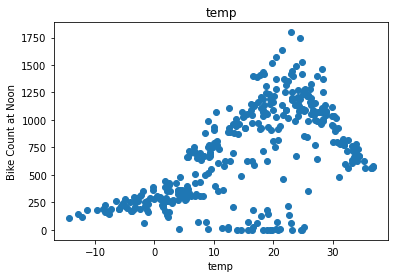

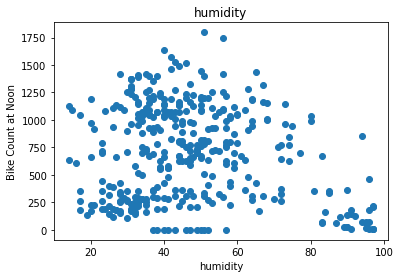

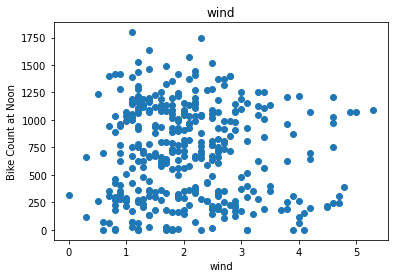

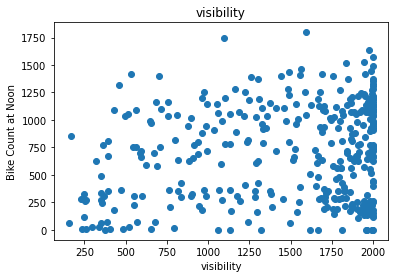

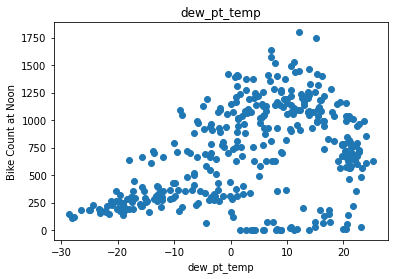

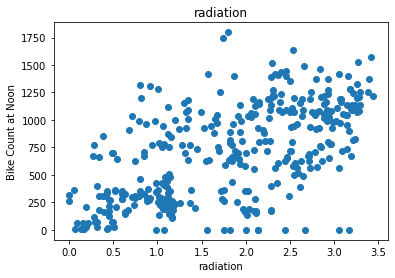

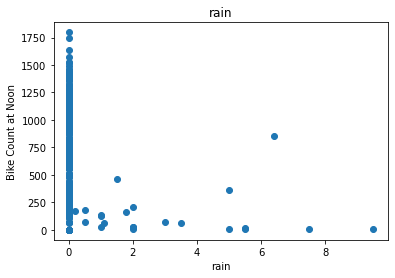

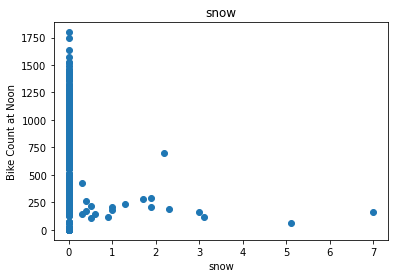

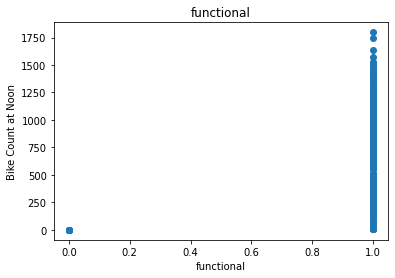

In [10]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Bike Count at Noon")
  plt.show()
  print()

In [11]:
df = df.drop(["wind", "visibility", "functional"], axis=1)

In [12]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


## Training, Validation and Testing Data

In [13]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [14]:
valid.head(), train.head(), test.head()

(      bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
 1740         174  -3.9        28        -19.7       2.12   0.0   0.0
 7332           0  19.4        41          5.7       2.67   0.0   0.0
 1476         160  -1.0        35        -14.5       0.64   0.0   3.0
 5580         735  34.2        35         16.5       3.14   0.0   0.0
 5148         944  30.1        64         22.5       2.54   0.0   0.0,
       bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
 3852           0  19.8        49          8.7       3.17   0.0   0.0
 6612        1075  27.5        43         13.7       2.75   0.0   0.0
 3444          10   9.0        96          8.3       0.43   5.5   0.0
 1380         145  -7.7        32        -21.5       1.13   0.0   0.3
 3564        1278  20.5        31          2.7       3.18   0.0   0.0,
       bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
 6252         952  29.8        33         11.7       3.14   0.0   0.0
 6588        1086 

In [15]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)

  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c != y.label]].values
  else:
    if len(x_labels) == 1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((x, y))

  return data, x, y

## Single Linear Regression

In [18]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[24.19743253]] [360.50400553]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.1281837560716843

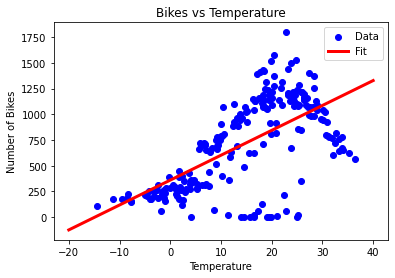

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Number of Bikes")
plt.show()

## Multiple Linear Regression

In [35]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [36]:
_, x_train, y_train = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_valid, y_valid = get_xy(valid, "bike_count", x_labels=df.columns[1:])
_, x_test, y_test = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [37]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [38]:
reg.score(x_test, y_test)

0.4549799334442707

In [39]:
y_pred_lr = reg.predict(x_test)

## Regression Using Neural Network (Single Node)

In [16]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Sq Error')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [ ]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss='mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    x_train_temp.reshape(-1), y_train_temp, 
    # verbose=0,
    epochs=1000,
    validation_data=(x_valid_temp, y_valid_temp)
)

Epoch 1/1000
7/7 [==============================] - 0s 16ms/step - loss: 481047.3750 - val_loss: 375823.3750
Epoch 2/1000
7/7 [==============================] - 0s 12ms/step - loss: 480155.5938 - val_loss: 374985.6250
Epoch 3/1000
7/7 [==============================] - 0s 11ms/step - loss: 479254.0625 - val_loss: 374152.9375
Epoch 4/1000
7/7 [==============================] - 0s 10ms/step - loss: 478364.3125 - val_loss: 373316.4375
Epoch 5/1000
7/7 [==============================] - 0s 10ms/step - loss: 477454.4688 - val_loss: 372495.2188
Epoch 6/1000
7/7 [==============================] - 0s 8ms/step - loss: 476570.4688 - val_loss: 371669.7188
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 475669.1250 - val_loss: 370852.1250
Epoch 8/1000
7/7 [==============================] - 0s 9ms/step - loss: 474770.8750 - val_loss: 370044.4375
Epoch 9/1000
7/7 [==============================] - 0s 8ms/step - loss: 473892.3750 - val_loss: 369232.3438
Epoch 10/1000
7/7 [====

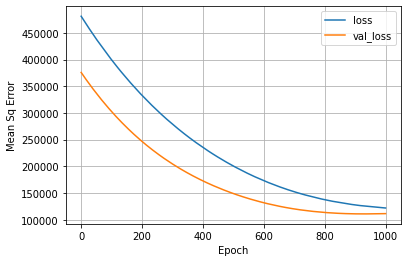

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


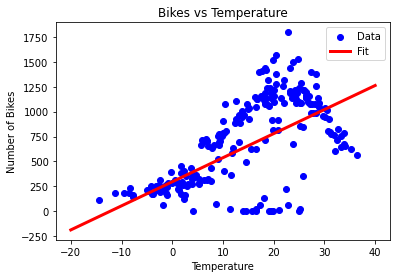

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Number of Bikes")
plt.show()

## Neural Network With Multiple Nodes

### Single Feature

In [21]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Sq Error')
  plt.legend()
  plt.grid(True)
  plt.show()

In [19]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [20]:
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [23]:
history = nn_model.fit(
    x_train_temp, y_train_temp, 
    # verbose=0,
    epochs=100,
    validation_data=(x_valid_temp, y_valid_temp)
)

Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 706800.3750 - val_loss: 563202.1875
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 706685.3125 - val_loss: 563079.5625
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 706537.0000 - val_loss: 562922.5000
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 706369.7500 - val_loss: 562755.4375
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 706188.6250 - val_loss: 562573.0625
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 705991.7500 - val_loss: 562367.2500
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 705754.4375 - val_loss: 562126.8750
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 705475.9375 - val_loss: 561843.0625
Epoch 9/100
7/7 [==============================] - 0s 12ms/step - loss: 705148.9375 - val_loss: 561511.7500
Epoch 10/100
7/7 [===============

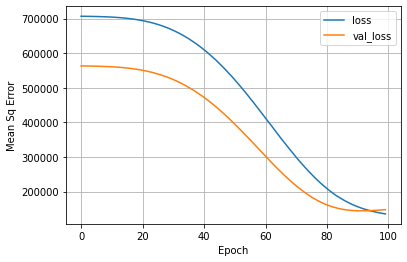

In [24]:
plot_loss(history)

4/4 [==============================] - 0s 4ms/step


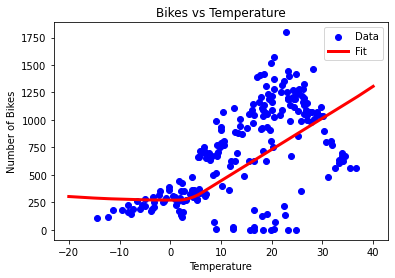

In [25]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temperature")
plt.xlabel("Temperature")
plt.ylabel("Number of Bikes")
plt.show()

### Multiple Features

In [54]:
normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
normalizer.adapt(x_train)

In [55]:
nn_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [56]:
history = nn_model.fit(
    x_train, y_train, 
    # verbose=0,
    epochs=100,
    validation_data=(x_valid, y_valid)
)

Epoch 1/100
7/7 [==============================] - 1s 32ms/step - loss: 706771.8750 - val_loss: 563171.1875
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 706547.3125 - val_loss: 562861.1875
Epoch 3/100
7/7 [==============================] - 0s 10ms/step - loss: 706197.2500 - val_loss: 562500.3750
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 705816.1250 - val_loss: 562113.4375
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 705399.8125 - val_loss: 561685.9375
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 704924.4375 - val_loss: 561191.3125
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 704355.9375 - val_loss: 560609.5625
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 703712.1250 - val_loss: 559914.6875
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 702897.4375 - val_loss: 559116.1250
Epoch 10/100
7/7 [=============

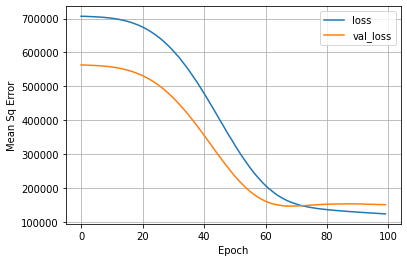

In [58]:
plot_loss(history)

## Comparison

In [59]:
# Calculate the MSE for both linear regression and neural network
y_pred_lr = reg.predict(x_test)
y_pred_nn = nn_model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [60]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [61]:
MSE(y_pred_lr, y_test)

98127.95491419554

In [62]:
MSE(y_pred_nn, y_test)

125514.62322185327

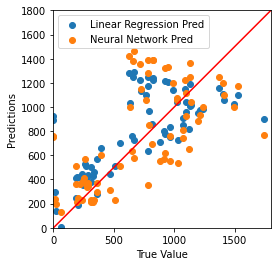

In [66]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, y_pred_lr, label="Linear Regression Pred")
plt.scatter(y_test, y_pred_nn, label="Neural Network Pred")
plt.xlabel("True Value")
plt.ylabel("Predictions")
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")